In [30]:
def symm_largest_irrep(n):
    G = SymmetricGroup(n)
    chartable = G.character_table()
    dims = [int(x[0]) for x in chartable[:,0]]
    return max(dims)
    

[1]
[1, 1]
[1, 2, 1]
[1, 3, 2, 3, 1]
[1, 4, 5, 6, 5, 4, 1]
[1, 5, 9, 5, 10, 16, 5, 10, 9, 5, 1]
[1, 6, 14, 14, 15, 35, 21, 21, 20, 35, 14, 15, 14, 6, 1]
[1, 7, 20, 28, 14, 21, 64, 70, 56, 42, 35, 90, 56, 70, 14, 35, 64, 28, 21, 20, 7, 1]
[1, 8, 27, 48, 42, 28, 105, 162, 84, 120, 168, 42, 56, 189, 216, 216, 168, 84, 70, 189, 120, 162, 42, 56, 105, 48, 28, 27, 8, 1]
[1, 9, 35, 75, 90, 42, 36, 160, 315, 288, 225, 450, 252, 210, 84, 350, 567, 300, 525, 768, 210, 300, 252, 126, 448, 525, 567, 450, 288, 42, 126, 350, 225, 315, 90, 84, 160, 75, 36, 35, 9, 1]
[1, 10, 44, 110, 165, 132, 45, 231, 550, 693, 330, 385, 990, 990, 660, 462, 120, 594, 1232, 1155, 1100, 2310, 1320, 1188, 825, 1320, 462, 210, 924, 1540, 825, 1540, 2310, 660, 1155, 990, 330, 252, 924, 1100, 1232, 990, 693, 132, 210, 594, 385, 550, 165, 120, 231, 110, 45, 44, 10, 1]
[1, 11, 54, 154, 275, 297, 132, 55, 320, 891, 1408, 1155, 616, 1925, 2673, 1320, 1650, 2112, 462, 165, 945, 2376, 3080, 1485, 2079, 5632, 5775, 4158, 2970, 19

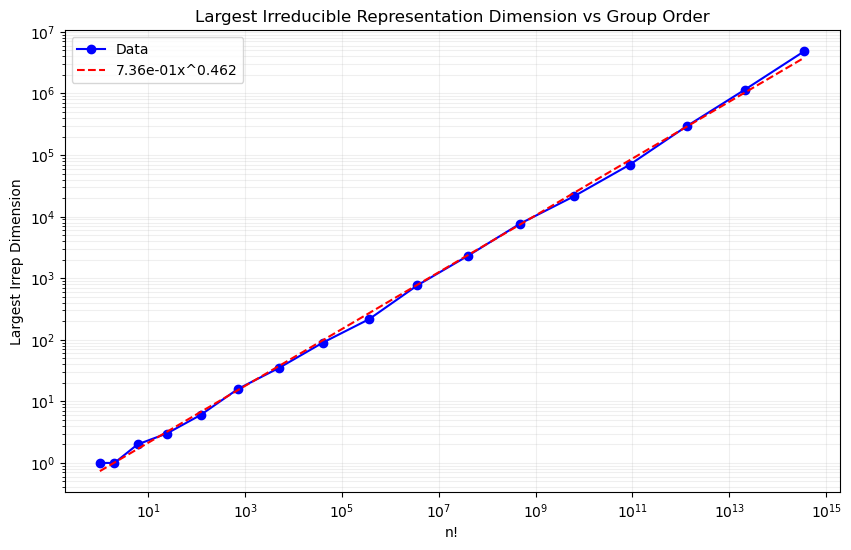

In [29]:
import matplotlib.pyplot as plt
import math
import numpy as np

def plot_symm_largest_irrep():
    # Generate data points for n = 1 to 7
    ns = range(1, 18)
    factorials = [math.factorial(n) for n in ns]
    dimensions = [symm_largest_irrep(n) for n in ns]
    
    # Create power law fit
    log_x = np.log(factorials)
    log_y = np.log(dimensions)
    # Fit line to log-log plot
    coeffs = np.polyfit(log_x, log_y, 1)
    m = coeffs[0]  # slope
    C = np.exp(coeffs[1])  # exponential of y-intercept
    
    # Generate points for smooth curve
    x_fit = np.logspace(np.log10(min(factorials)), np.log10(max(factorials)), 100)
    y_fit = C * x_fit**m
    
    # Create log-log plot
    plt.figure(figsize=(10, 6))
    plt.loglog(factorials, dimensions, 'bo-', label='Data')  # blue dots with lines
    plt.loglog(x_fit, y_fit, 'r--', label=f'{C:.2e}x^{m:.3f}')  # red dashed line
    
    # Add labels and title
    plt.xlabel('n!')
    plt.ylabel('Largest Irrep Dimension')
    plt.title('Largest Irreducible Representation Dimension vs Group Order')
    
    # Add grid and legend
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()
    
    # Show plot
    plt.show()

plot_symm_largest_irrep()